# Analysis notebook for July Wildtype Cohort (07/2024)

## Description of experiment:  
This cohort was used as a follow up to the previous wildtype cohort trained in March.   
The intentions/ questions were as follows:  
To replicate and increase n number of previous experiments, particularly the 100ms cue presentation experiment.  
To examine changes in performance as mice repeat the 100ms cue task over a number of days (is there learning that changes the peripheral performance?).  
What happens to the peripheral attention as cue presentation time is reduced past 100ms?  
Is the peripheral attention deficit modulated by any aspects about cue presentation?  

## Timeline of experiment:
<pre>
4 days training from 17th - 20th July  
Sunday 21st - no behaviour  
Monday 22nd - 750ms cue presentation time  
       23rd - 500ms  
    24-26th - 100ms (learning experiment)  
       29th - 50ms  
       30th - 25ms  
       31st - 5ms
Monday 5th  - wait catch (2s)
       6th  - wait catch (2s)
       7th  - LED catch (15%)
       8th  - LED catch (15%)
</pre>


# Setup:

## Imports:

In [1]:
# Imports:


from matplotlib import pyplot as plt
from Session_nwb import Session
from pathlib import Path
from Cohort_folder import Cohort_folder
import json
import os
import numpy as np
from IPython.display import clear_output

try:
    behaviour_data = Path(os.getenv("behaviour_data"))
except TypeError:
    print('"behaviour_data" environment variable does not exist.')
    try:
        behaviour_data = Path(r"/lmb/home/srogers/DATA")
    except TypeError:
        raise Exception("Tried using hex path but not available.")

July_cohort_directory = behaviour_data / 'July_portable'
March_cohort_directory = behaviour_data / 'March_portable'

july_cohort = Cohort_folder(July_cohort_directory, multi = True, portable_data = True)
july_cohort_info = july_cohort.cohort
july_phases = july_cohort.phases()

march_cohort = Cohort_folder(March_cohort_directory, multi = True, portable_data = True)
march_cohort_info = july_cohort.cohort
march_phases = march_cohort.phases()

# Import plotting functions:
import importlib
from Session_nwb import Session


Loading cohort info...
Loading cohort info...


## Define session lists:

### July:

In [2]:
# Get sessions for different cue presentation times:

"""something odd with session 9 data on this day, think it was a bad day:"""

# july_session_9_exclusion = ['240720_113303_wtjx300-6a', '240720_113303_wtjx300-6b']
# july_session_9 = [session for session in july_phases['9'] if session[:6] == '240720' \
#                   if session not in july_session_9_exclusion]

july_cue_group_750ms = [session for session in july_phases['9c'] if session[:6] == '240722']
july_cue_group_500ms = [session for session in july_phases['9c'] if session[:6] == '240723']

july_day_1_100ms = [session for session in july_phases['9c'] if session[:6] == '240724']
july_day_2_100ms = [session for session in july_phases['9c'] if session[:6] == '240725']
july_day_3_100ms = [session for session in july_phases['9c'] if session[:6] == '240726']

july_cue_group_50ms = [session for session in july_phases['9c'] if session[:6] == '240729']
july_cue_group_25ms = [session for session in july_phases['9c'] if session[:6] == '240730']
july_cue_group_5ms = [session for session in july_phases['9c'] if session[:6] == '240731']

# Catch trial sessions:
july_wait_catch_day_1 = [session for session in july_phases['10'] if session[:6] == '240805']
july_wait_catch_day_2 = [session for session in july_phases['10'] if session[:6] == '240806']
july_total_wait_catch = july_wait_catch_day_1 + july_wait_catch_day_2

july_LED_catch_day_1 = [session for session in july_phases['10'] if session[:6] == '240807']
july_LED_catch_day_2 = [session for session in july_phases['10'] if session[:6] == '240808']
july_total_LED_catch = july_LED_catch_day_1 + july_LED_catch_day_2


### March:

In [3]:
# Define the lists of session IDs first
march_cue_group_unlimited = [session for session in march_phases['9'] if session[:6] == '240323']

march_cue_group_1000 = [session for session in march_phases['9c'] if session[:6] == '240324']

march_exclusion_500 = ['240325_183546_wtjx298-2b', '240325_183459_wtjx299-4a']  # Exclude specific sessions
march_cue_group_500 = [session for session in march_phases['9c'] if session[:6] == '240325' \
                       if session not in march_exclusion_500]

march_cue_group_300 = [session for session in march_phases['9c'] if session[:6] == '240326']

march_exclusion_100 = ['240327_160220_wtjx299-4a', '240327_160142_wtjx298-2b']  # Exclude specific sessions
march_cue_group_100 = [session for session in march_phases['9c'] if session[:6] == '240327' \
                       if session not in march_exclusion_100]



# Plots plan:
Plot performance during 100ms cue over the three days to see if there's a change in performance.   
If there is a change in performance, pick the last day and plot that.   
If there isn't, group them together and plot that as representative of 100ms cue.   

Then plot all cue times together, from 750 to 5ms, on the same plot.   
For each cue group, import the previous cohorts data and compare, and if similar, group together for one very large cohort plot.   
  
For the catch trials, the goal is to compare the performance in the normal trials to the catch trials. I will need to sort these trials out and bin them seperately, then plot the performance radially as two loops. It may be necessary to group sides. 

# Plotting 100ms learning:

## Session loading:

In [4]:
july_day_1_100ms_exclusion = ['240724_115623_wtjx300-6a']
july_day_1_100ms_sessions = [Session(july_cohort.get_session(session)) for session in july_day_1_100ms \
                             if session not in july_day_1_100ms_exclusion]

july_day_2_100ms_sessions = [Session(july_cohort.get_session(session)) for session in july_day_2_100ms]
july_day_3_100ms_sessions = [Session(july_cohort.get_session(session)) for session in july_day_3_100ms]

clear_output(wait=True)
print("Sessions Loaded")

Sessions Loaded


In [61]:
march_cue_group_100_sessions = [Session(march_cohort.get_session(session)) \
                                for session in march_cue_group_100 \
                                if session not in march_exclusion_100]

Loading session 240327_121146_wtjx287-5c...
Loading session 240327_121504_wtjx287-5b...
Loading session 240327_132449_wtjx287-5d...
Loading session 240327_132521_wtjx306-1a...
Loading session 240327_144246_wtjx306-1b...
Loading session 240327_151337_wtjx306-1b...
Loading session 240327_144313_wtjx298-2a...
Loading session 240327_151415_wtjx298-2a...


## Plot function:

In [57]:
import PP_plot_performance

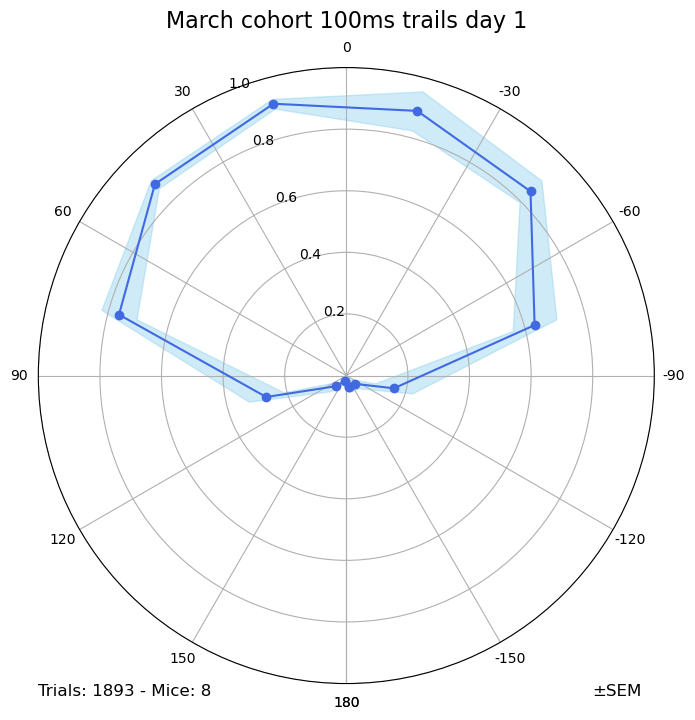

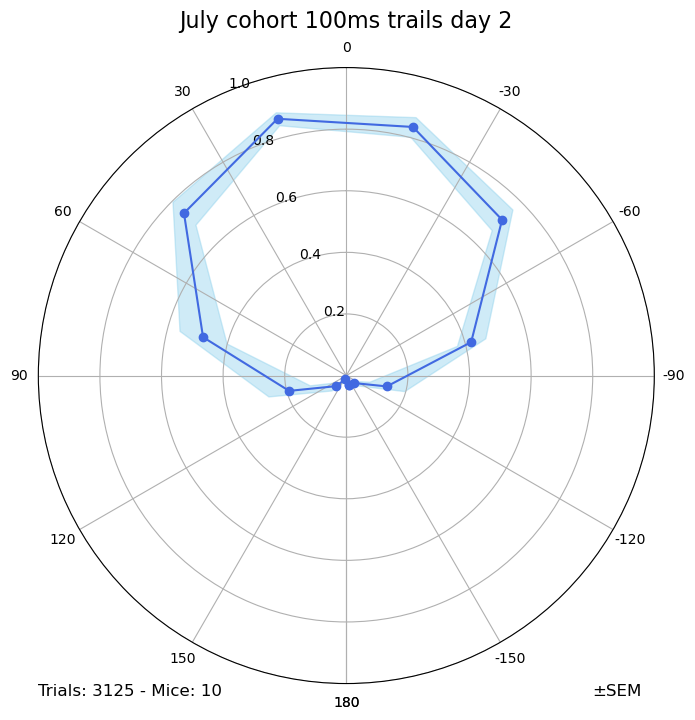

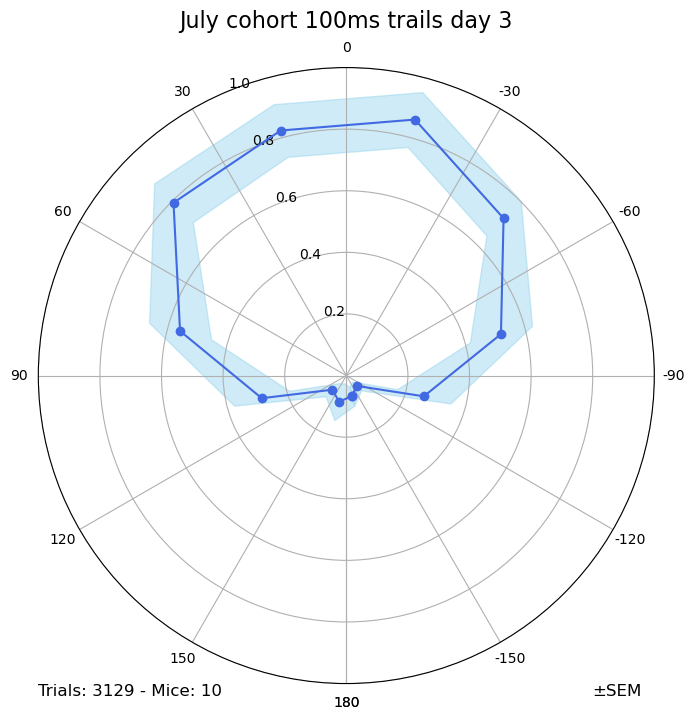

In [64]:
importlib.reload(PP_plot_performance)

"""
Something weird going on with day 1 data.
"""
PP_plot_performance.plot_performance_by_angle(march_cue_group_100_sessions, 
                                              title = 'March cohort 100ms trails day 1', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

PP_plot_performance.plot_performance_by_angle(july_day_2_100ms_sessions, 
                                              title = 'July cohort 100ms trails day 2', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

PP_plot_performance.plot_performance_by_angle(july_day_3_100ms_sessions, 
                                              title = 'July cohort 100ms trails day 3', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

# PP_plot_performance.plot_performance_by_angle(july_day_2_100ms_sessions, 
#                                               title = '100ms trails day 2', 
#                                               bin_mode = 'rice', 
#                                               trials_per_bin=100, 
#                                               plot_mode='radial', 
#                                               cue_mode='both',
#                                               error_bars='SEM')

# PP_plot_performance.plot_performance_by_angle(july_day_3_100ms_sessions, 
#                                               title = '100ms trails day 3', 
#                                               bin_mode = 'rice', 
#                                               trials_per_bin=100, 
#                                               plot_mode='radial', 
#                                               cue_mode='both',
#                                               error_bars='SEM')

# Plot cue time experiment:

## Session loading

### July:

In [5]:
# july_session_9_sessions = [Session(july_cohort.get_session(session)) \
#                                  for session in july_session_9]

july_exclusion_750 = ['240722_182909_wtjp254-4a']
july_cue_group_750ms_sessions = [Session(july_cohort.get_session(session)) \
                                 for session in july_cue_group_750ms \
                                 if session not in july_exclusion_750]

july_cue_group_500ms_sessions = [Session(july_cohort.get_session(session)) \
                                 for session in july_cue_group_500ms]

# day_2_100ms_sessions = day_2_100ms_sessions

july_cue_group_50ms_sessions = [Session(july_cohort.get_session(session)) \
                                for session in july_cue_group_50ms]

july_cue_group_25ms_sessions = [Session(july_cohort.get_session(session)) \
                                for session in july_cue_group_25ms]

july_exclusion_5 = ['240731_170700_wtjp254-4a']
july_cue_group_5ms_sessions = [Session(july_cohort.get_session(session)) \
                               for session in july_cue_group_5ms \
                               if session not in july_exclusion_5]

clear_output(wait=True)
print("Sessions loaded")

Sessions loaded


### March:

In [6]:
march_cue_group_unlimited_sessions = [Session(march_cohort.get_session(session)) \
                                      for session in march_cue_group_unlimited]

march_cue_group_1000_sessions = [Session(march_cohort.get_session(session)) \
                                 for session in march_cue_group_1000]

march_cue_group_500_sessions = [Session(march_cohort.get_session(session)) \
                                for session in march_cue_group_500 \
                                if session not in march_exclusion_500]

march_cue_group_300_sessions = [Session(march_cohort.get_session(session)) \
                                for session in march_cue_group_300]

march_cue_group_100_sessions = [Session(march_cohort.get_session(session)) \
                                for session in march_cue_group_100 \
                                if session not in march_exclusion_100]

clear_output(wait=True)
print("Sessions loaded")

Sessions loaded


## Plot functions:

In [7]:
import PP_plot_cue_time_experiment 

### July cue time experiment plotting

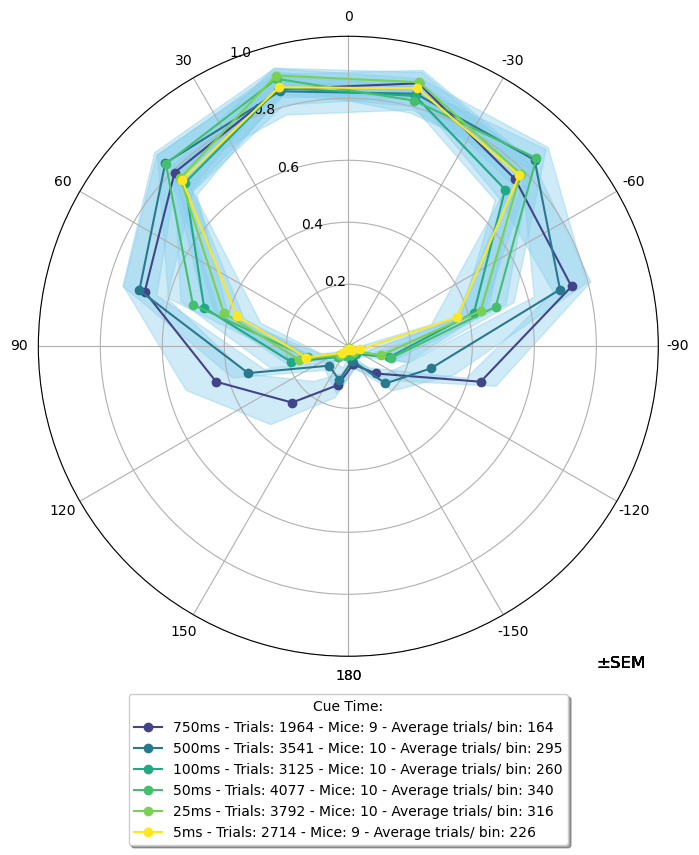

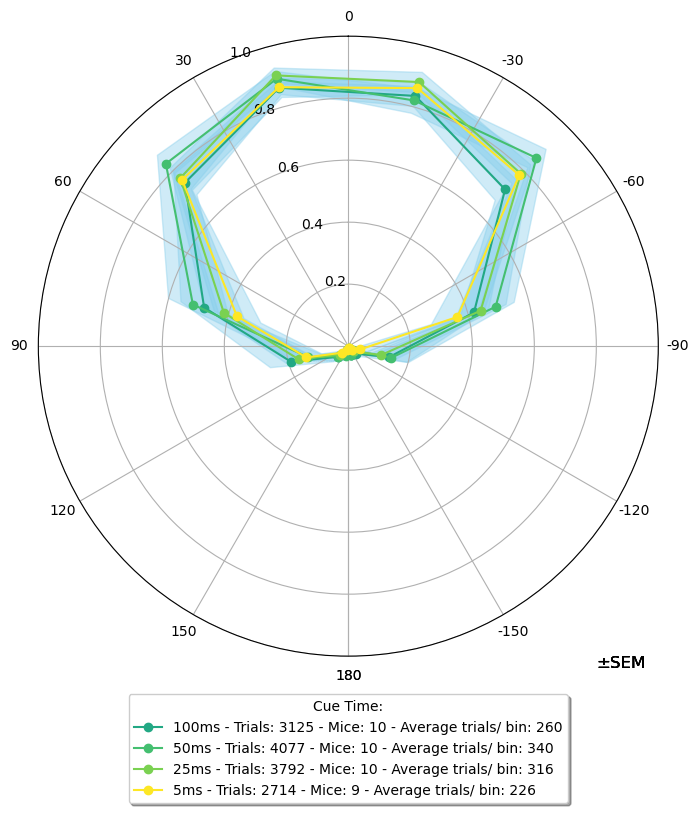

In [8]:
# July times:

    # All times used:

sessions = [july_cue_group_750ms_sessions, 
            july_cue_group_500ms_sessions, 
            july_day_2_100ms_sessions, 
            july_cue_group_50ms_sessions, 
            july_cue_group_25ms_sessions, 
            july_cue_group_5ms_sessions]
cue_times = ['750ms', '500ms', '100ms', '50ms', '25ms', '5ms']

importlib.reload(PP_plot_cue_time_experiment)

PP_plot_cue_time_experiment.plot_performance_by_angle(sessions,
                                                      cue_times,
                                                      title = '',
                                                      bin_mode = 'manual',
                                                      trials_per_bin=100,
                                                      plot_mode='radial',
                                                      error_bars='SEM')

# PP_plot_cue_time_experiment.plot_performance_by_angle(sessions,
#                                                       cue_times,
#                                                       title = '',
#                                                       bin_mode = 'rice',
#                                                       trials_per_bin=100,
#                                                       plot_mode='radial',
#                                                       error_bars='SEM')


    # 100ms down:
    
sessions = [july_day_2_100ms_sessions, 
            july_cue_group_50ms_sessions, 
            july_cue_group_25ms_sessions, 
            july_cue_group_5ms_sessions]
cue_times = ['100ms', '50ms', '25ms', '5ms']

PP_plot_cue_time_experiment.plot_performance_by_angle(sessions,
                                                      cue_times,
                                                      title = '',
                                                      bin_mode = 'manual',
                                                      trials_per_bin=100,
                                                      plot_mode='radial',
                                                      error_bars='SEM')

# PP_plot_cue_time_experiment.plot_performance_by_angle(sessions,
#                                                       cue_times,
#                                                       title = '',
#                                                       bin_mode = 'rice',
#                                                       trials_per_bin=100,
#                                                       plot_mode='radial',
#                                                       error_bars='SEM')

### March and July mixed plotting:

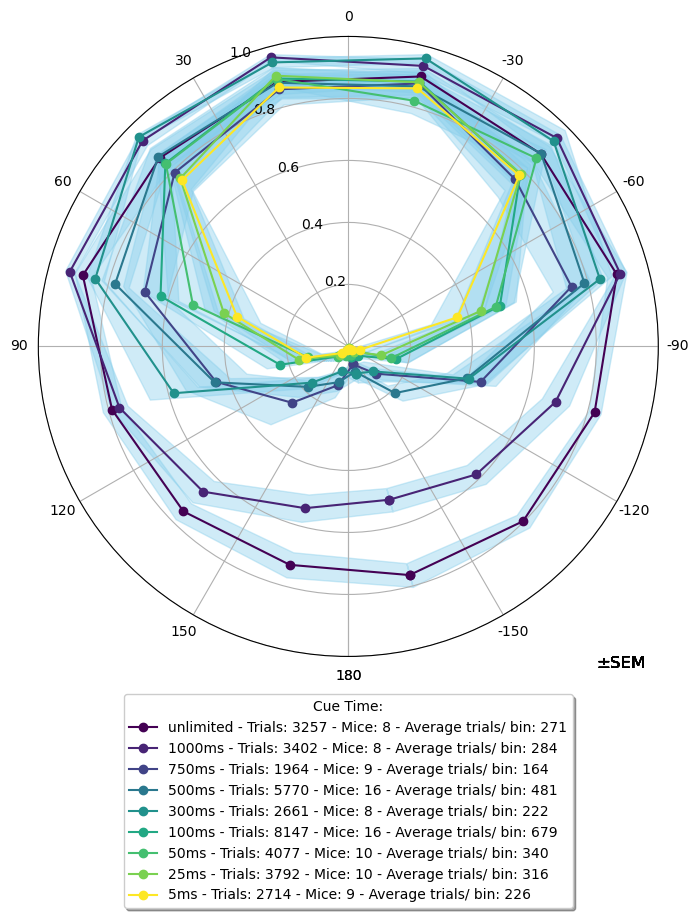

In [9]:
# Mixed March and July cohort:

importlib.reload(PP_plot_cue_time_experiment)
print()
sessions = [july_cue_group_750ms_sessions, 
            july_cue_group_500ms_sessions, 
            july_day_2_100ms_sessions, 
            july_day_3_100ms_sessions,
            july_cue_group_50ms_sessions, 
            july_cue_group_25ms_sessions, 
            july_cue_group_5ms_sessions,
            march_cue_group_unlimited_sessions,
            march_cue_group_1000_sessions,
            march_cue_group_500_sessions,
            march_cue_group_300_sessions,
            march_cue_group_100_sessions]

cue_times = ['750ms', '500ms', '100ms', '100ms', '50ms', '25ms', '5ms', 
             'unlimited', '1000ms', '500ms', '300ms', '100ms']

PP_plot_cue_time_experiment.plot_performance_by_angle(sessions,
                                                      cue_times,
                                                      title = '',
                                                      bin_mode = 'manual',
                                                      trials_per_bin=100,
                                                      plot_mode='radial',
                                                      error_bars='SEM')

# Plotting wait time catch trials:

## Session loading:

In [70]:
july_wait_catch_day_1_exclusion = ['240805_182539_wtjp254-4b', '240805_141718_wtjx307-6a']
july_wait_catch_day_1_sessions = [Session(july_cohort.get_session(session)) \
                                  for session in july_wait_catch_day_1 \
                                    if session not in july_wait_catch_day_1_exclusion]

july_wait_catch_day_2_exclusion = ['240806_123907_wtjx307-6a', '240806_151525_wtjx261-2b']
july_wait_catch_day_2_sessions = [Session(july_cohort.get_session(session)) \
                                  for session in july_wait_catch_day_2 \
                                    if session not in july_wait_catch_day_2_exclusion]


clear_output(wait=True)
print("Sessions loaded")

Sessions loaded


## Plotting:

In [71]:
# plotting catch trial experiment:
import PP_plot_catch_trial_performance


In [ ]:
session = july_wait_catch_day_1_sessions[0]

catch_count = 0

for trial in session.trials:
    if trial['catch'] == True:
        catch_count += 1

print(catch_count)

Normal Performance Mean: [0.02348429 0.02777378 0.1603961  0.46192462 0.83126294 0.92738373
 0.91062134 0.80321858 0.51358949 0.20233994 0.0601539  0.02528176]
Catch Performance Mean: [0.00740741 0.07237654 0.11762769 0.63822751 0.73412698 0.93611111
 0.92283951 0.70771605 0.49082892 0.3341625  0.03783069 0.039252  ]


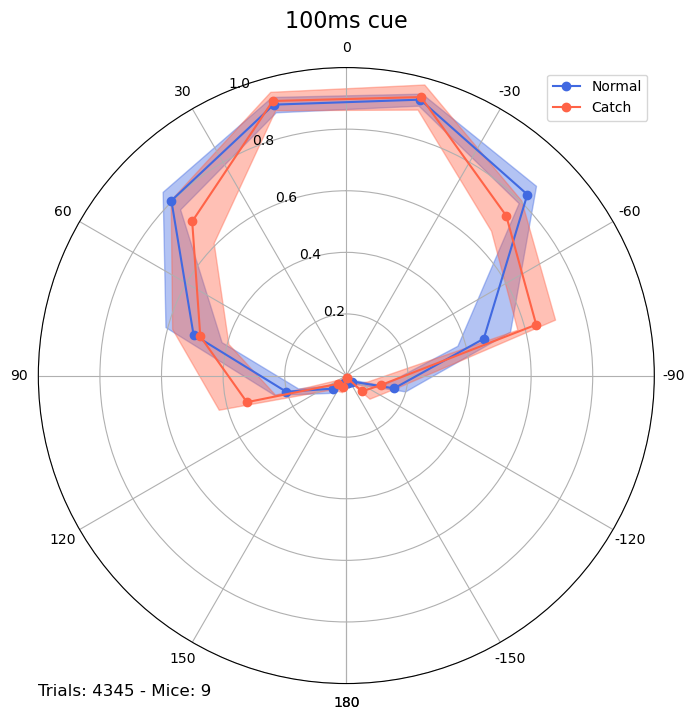

In [72]:
importlib.reload(PP_plot_catch_trial_performance)

sessions = july_wait_catch_day_1_sessions + july_wait_catch_day_2_sessions

PP_plot_catch_trial_performance.plot_performance_by_angle(sessions, 
                                              title = '100ms cue', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

# Plotting LED brightness catch trials:

## Session loading:

In [73]:
july_LED_catch_day_1_exclusion = []
# LED_catch_day_1_sessions = [Session(cohort.get_session(session)) for session in [LED_catch_day_1[0]] if session not in LED_catch_day_1_exclusion]

july_LED_catch_day_1_sessions = [Session(july_cohort.get_session(session)) \
                                 for session in july_LED_catch_day_1 \
                                    if session not in july_LED_catch_day_1_exclusion]

july_LED_catch_day_2_exclusion = []
july_LED_catch_day_2_sessions = [Session(july_cohort.get_session(session)) \
                                 for session in july_LED_catch_day_2 \
                                    if session not in july_LED_catch_day_2_exclusion]

clear_output(wait=True)
print("Sessions loaded")

Sessions loaded


## Plotting:

In [74]:
# plotting catch trial experiment:
import PP_plot_catch_trial_performance


Normal Performance Mean: [0.0294621  0.04993079 0.17097557 0.55617186 0.86643045 0.90094624
 0.89398148 0.84298247 0.63521604 0.21690179 0.05664334 0.02420178]
Catch Performance Mean: [0.03234252 0.06749198 0.11507937 0.44898823 0.62226496 0.83654762
 0.86571429 0.80229437 0.50483405 0.26606533 0.07830229 0.05926986]


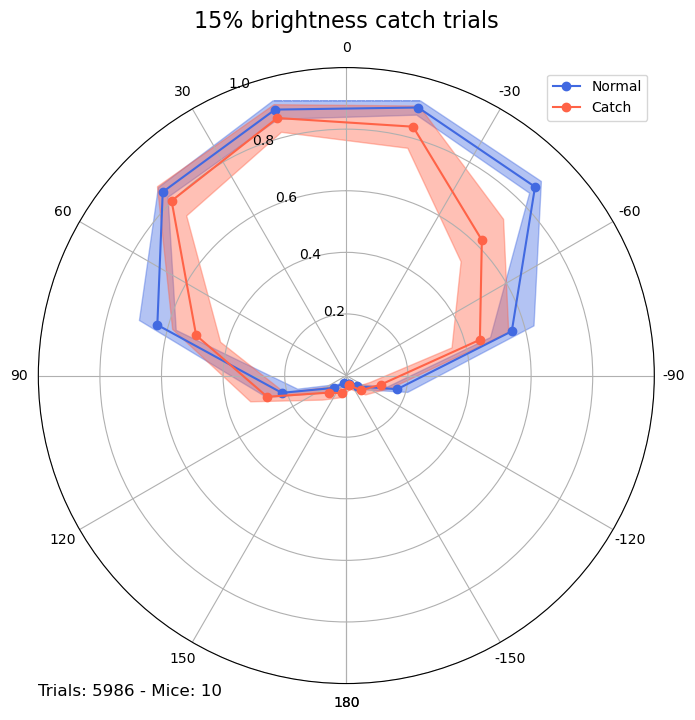

In [75]:
importlib.reload(PP_plot_catch_trial_performance)

sessions = july_LED_catch_day_1_sessions + july_LED_catch_day_2_sessions

PP_plot_catch_trial_performance.plot_performance_by_angle(sessions, 
                                              title = '15% brightness catch trials', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

# Plotting performance with bias compensation:

## Explanation:

Plot the 100ms performance with adjustment for bias of the mouse guesses.  
  
To achieve this, I will find the underlying bias of the mice towards ports by plotting a radial histogram of port selection for all trials excpet timeouts. If I divide each bins value by the total number of trials it will give a value between 0-1 that represents the underlying bias.   
  
What I can then do is normalise success rate based on each bins bias, by dividing performance by bias.   
If there is no bias then the rate of port visits will match the performance values, since the mouse will only visit those ports when the led goes on and not touch any others. If there is a bias though, then the ports that are more likely to be touched will be discounted by having a higher proportion of port visits overall, and the ones less visited randomly will be increased by being divided by a smaller number.   
  
The sum of the biases will equal 1.

## Session loading:

In [ ]:
july_day_2_100ms = [session for session in july_phases['9c'] \
                    if session[:6] == '240725']

july_day_2_100ms_sessions = [Session(july_cohort.get_session(session)) for session in july_day_2_100ms]

july_day_3_100ms = [session for session in july_phases['9c'] \
                    if session[:6] == '240726'] 

july_day_3_100ms_sessions = [Session(july_cohort.get_session(session)) for session in july_day_3_100ms]

clear_output(wait=True)
print("Sessions loaded")

## Plotting:

In [80]:
import PP_plot_performance_bias_adjusted

[0.17442634 0.23526323 0.33769259 0.91688116 0.87957129 0.6717033
 0.57217703 0.64945774 0.58240714 0.40489595 0.26793414 0.20767902]


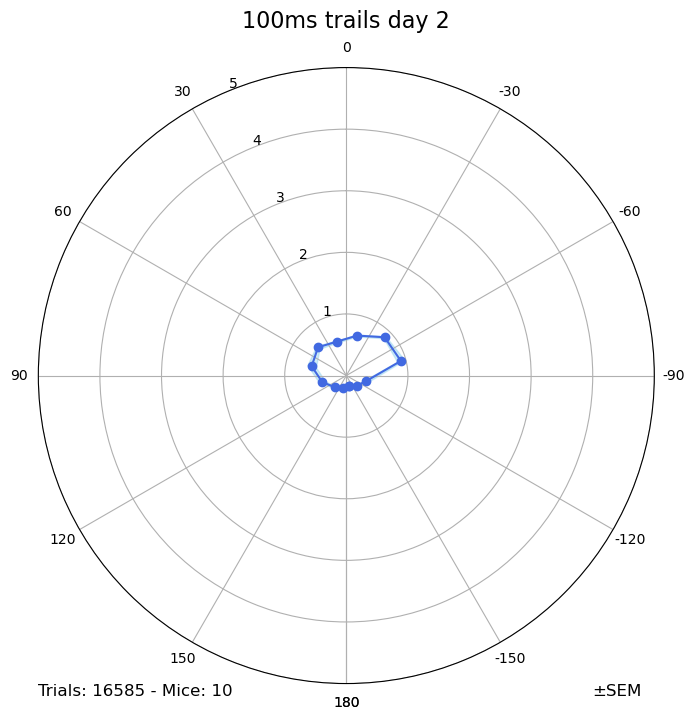

In [81]:
importlib.reload(PP_plot_performance_bias_adjusted)

# sessions = july_day_2_100ms_sessions + \
#             july_day_3_100ms_sessions

all_100ms_sessions = july_day_2_100ms_sessions \
                    + july_day_3_100ms_sessions \
                    + july_LED_catch_day_1_sessions \
                    + july_LED_catch_day_2_sessions \
                    + july_wait_catch_day_1_sessions \
                    + july_wait_catch_day_2_sessions

PP_plot_performance_bias_adjusted.plot_performance_by_angle(all_100ms_sessions, 
                                              title = '100ms trails day 2', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

# Group all 100ms trials:

## Session loading:

In [76]:
all_100ms_sessions = july_day_2_100ms_sessions \
                    + july_day_3_100ms_sessions \
                    + july_LED_catch_day_1_sessions \
                    + july_LED_catch_day_2_sessions \
                    + july_wait_catch_day_1_sessions \
                    + july_wait_catch_day_2_sessions

## Plotting:

wtjx300-6a
wtjx300-6b
wtjx307-6c
wtjx307-6a
wtjx307-6b
wtjx261-2a
wtjx261-2b
wtjx262-2a
wtjp254-4a
wtjp254-4b


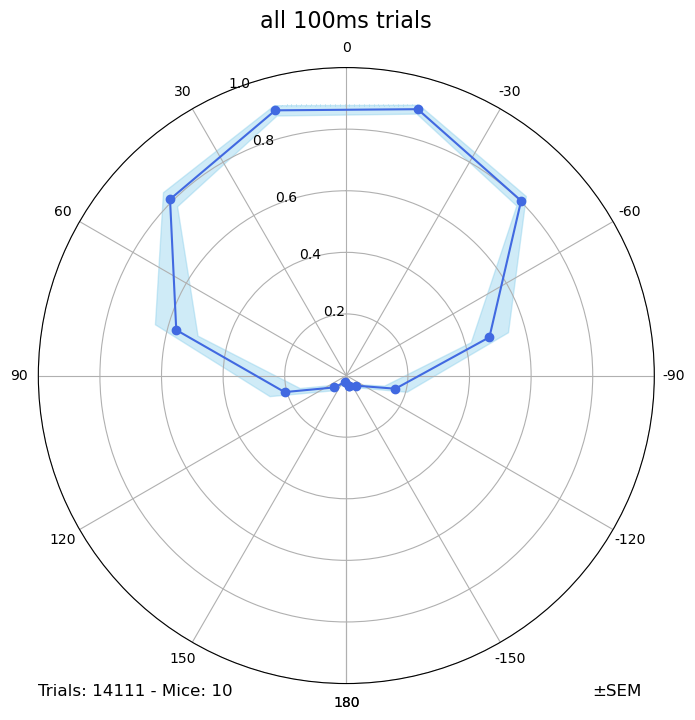

In [79]:
importlib.reload(PP_plot_performance)

PP_plot_performance.plot_performance_by_angle(all_100ms_sessions, 
                                              title = 'all 100ms trials', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

# Evaluate mouse head movements during cue presentation:

## Plot data:

Ok so I know that mouse heading is unchanged on average for 100ms cues. I think to show this as a plot for all times, I will quanitify percentage of the turn made. Then for mice in 100ms trials they will make 0 percent but longer ones it will be higher. Just for successful trials.  
The hope here is that I will end up with something like a bar chart, with bars for each cue time showing an average.

In [10]:
import PP_cue_offset_percentage_turn

In [ ]:
july_day_2_100ms_sessions = [Session(july_cohort.get_session(session)) for session in july_day_2_100ms]

march_cue_group_100_sessions = [Session(march_cohort.get_session(session)) \
                                for session in march_cue_group_100 \
                                if session not in march_exclusion_100]

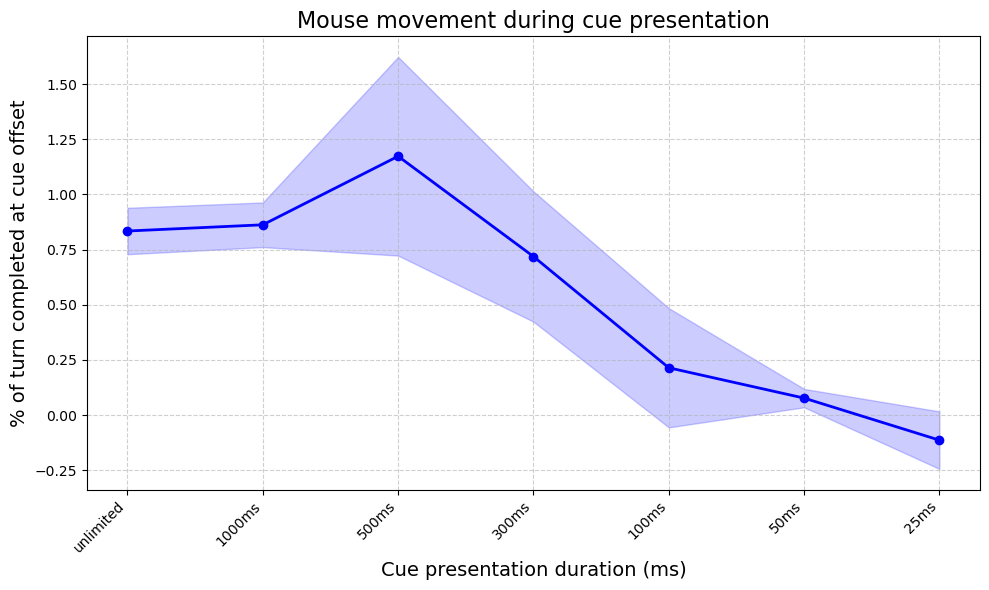

In [56]:
importlib.reload(PP_cue_offset_percentage_turn)

# sessions = [july_cue_group_750ms_sessions, 
#             july_cue_group_500ms_sessions, 
#             july_day_2_100ms_sessions, 
#             july_day_3_100ms_sessions,
#             july_cue_group_50ms_sessions, 
#             july_cue_group_25ms_sessions, 
#             july_cue_group_5ms_sessions,
#             march_cue_group_unlimited_sessions,
#             march_cue_group_1000_sessions,
#             march_cue_group_500_sessions,
#             march_cue_group_300_sessions,
#             march_cue_group_100_sessions]

# cue_times = ['750ms', '500ms', '100ms', '100ms', '50ms', '25ms', '5ms', 
#              'unlimited', '1000ms', '500ms', '300ms', '100ms']

sessions = [july_cue_group_500ms_sessions, 
            july_day_2_100ms_sessions, 
            july_day_3_100ms_sessions,
            july_cue_group_50ms_sessions, 
            july_cue_group_25ms_sessions, 
            march_cue_group_unlimited_sessions,
            march_cue_group_1000_sessions,
            march_cue_group_500_sessions,
            march_cue_group_300_sessions,
            march_cue_group_100_sessions]

cue_times = ['500ms', '100ms', '100ms', '50ms', '25ms', 
             'unlimited', '1000ms', '500ms', '300ms', '100ms']

# sessions = [july_day_2_100ms_sessions, 
#             march_cue_group_100_sessions]
# cue_times = ['100ms', '100ms']

PP_cue_offset_percentage_turn.mouse_heading_cue_offset(sessions = sessions,
                                                       cue_times = cue_times,
                                                       title = 'Mouse movement during cue presentation')